## Df + Lib

In [55]:
%store -r merge_unique_df

In [56]:
# essential
import pandas as pd
import matplotlib.pyplot as plt

# for NN
import keras
from keras.models import Sequential
# we most use sequential model -> one layer after the other (sequence of layer)
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# non so se siano utili
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#basics 
# essential
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# in order to obtain the True/False for each genre
onehot_enc=pd.get_dummies(merge_unique_df['maingenere'],prefix='genre')
onehot_enc.head(2)

,genre_blues,genre_country,genre_dance,genre_disco,genre_folk,genre_funk,genre_house,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [58]:
# Conversione in valori binari (0 o 1) per rappresentare il main genere con 1 e gli altri con 0
one_hot_enc_binary = onehot_enc.applymap(lambda x: 1 if x else 0)

C:\Users\elped\AppData\Local\Temp\ipykernel_9032\823651478.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  one_hot_enc_binary = onehot_enc.applymap(lambda x: 1 if x else 0)


In [59]:
# we merge the 2 df
df_one_hot=pd.concat([merge_unique_df,one_hot_enc_binary],axis=1)
df_one_hot.head(2)

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0,0,0,0,1,0,0,0,0,0
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0,0,0,0,1,0,0,0,0,0


## U1 - Test ONE HOT

In [60]:
mask_u1=df_one_hot['User']==1
u1_onehot_df=df_one_hot[mask_u1]
u1_onehot_df.shape

(4669, 38)

### NN - test ONE HOT

In [61]:
# FIRST WE NEED TO DEFINE THE FEATURES
numerical_features = [
    'spotify_track_duration_minute', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

genre_features = [col for col in u1_onehot_df.columns if col.startswith('genre_')]

# UNION OF THE TWO 
total_features = numerical_features + genre_features

target='valence'

In [62]:
# DEFINITION OF TARGET AND FEATURES

x=u1_onehot_df[total_features]

y=u1_onehot_df[target]

In [63]:
# first we have to standardize
scaler=StandardScaler()
x[numerical_features]=scaler.fit_transform(x[numerical_features])

C:\Users\elped\AppData\Local\Temp\ipykernel_9032\3500654492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features]=scaler.fit_transform(x[numerical_features])


In [64]:
#TRAIN/TEST
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
model_onehot=Sequential([
    Dense(32,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(16,activation='relu'),
    Dense(1,activation='relu')
])

c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model_onehot.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [67]:
history_onehot=model_onehot.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2426 - mae: 0.4104 - val_loss: 0.0584 - val_mae: 0.1918
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0520 - mae: 0.1819 - val_loss: 0.0427 - val_mae: 0.1647
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0370 - mae: 0.1545 - val_loss: 0.0375 - val_mae: 0.1534
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0337 - mae: 0.1469 - val_loss: 0.0348 - val_mae: 0.1478
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300 - mae: 0.1384 - val_loss: 0.0332 - val_mae: 0.1450
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0276 - mae: 0.1330 - val_loss: 0.0330 - val_mae: 0.1439
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0265 - mae: 0.1301 - val_loss: 0.0323 - val_mae: 0.1408
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0264 - mae: 0.1302 - val_loss: 0.0319 - val_mae: 0.1397
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0251 - mae: 

In [68]:
loss, mae = model_onehot.evaluate(x_test, y_test)
print(f'Loss: {loss}, MAE: {mae}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0284 - mae: 0.1318
Loss: 0.028753267601132393, MAE: 0.1327509880065918


WE CAN SEE THAT sice LOSS is our MSE=0.0278 

when we use the simple NN our MSE is equal 0.0304

so seams that we have a reduction

we have also a reduction with respect with the cross validation 0.033

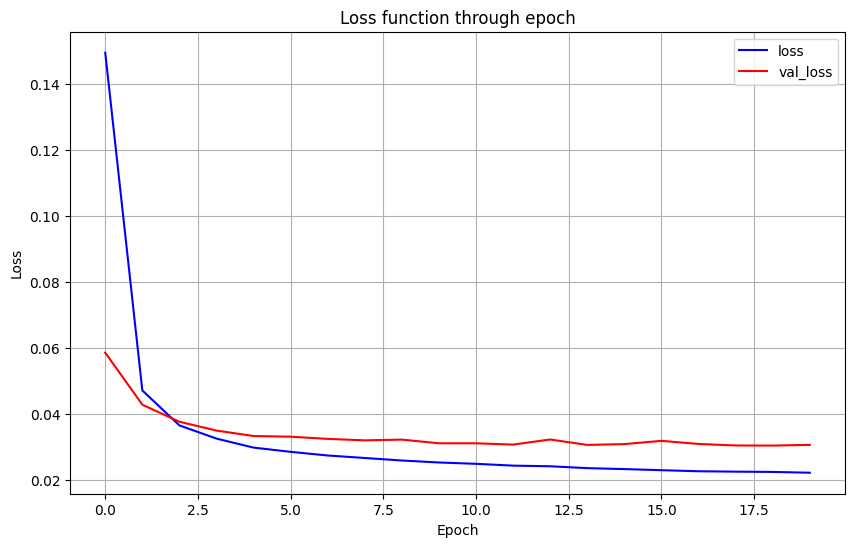

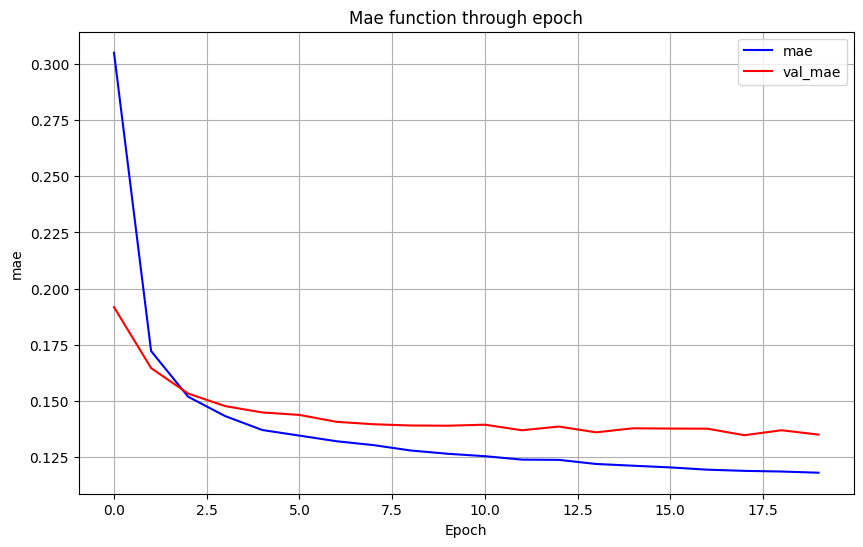

In [69]:
#SOME PLOT

#plot loss
plt.figure(figsize=(10,6))
plt.plot(history_onehot.history['loss'],color='blue',label='loss')
plt.plot(history_onehot.history['val_loss'],color='red',label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function through epoch')
plt.legend()
plt.grid()
plt.show()

    #plot mean
plt.figure(figsize=(10,6))
plt.plot(history_onehot.history['mae'],color='blue',label='mae')
plt.plot(history_onehot.history['val_mae'],color='red',label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.title('Mae function through epoch')
plt.grid()
plt.legend()
plt.show()   

## GENERALIZE ONE HOT - ENCODING - all users

In [70]:
numerical_features = [
    'spotify_track_duration_minute', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

genre_features = [col for col in u1_onehot_df.columns if col.startswith('genre_')]

# UNION OF THE TWO 
total_features = numerical_features + genre_features

target='valence'

### DEFINE FUNCTIONS

## PLOTS

In [71]:
def plot_for_model(history, y_hat, x_test):

    #plot loss
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'],color='blue',label='loss')
    plt.plot(history.history['val_loss'],color='red',label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss function through epoch')
    plt.legend()
    plt.grid()
    plt.show()

    #plot mean
    plt.figure(figsize=(10,6))
    plt.plot(history.history['mae'],color='blue',label='mae')
    plt.plot(history.history['val_mae'],color='red',label='val_mae')
    plt.xlabel('Epoch')
    plt.ylabel('mae')
    plt.title('Mae function through epoch')
    plt.grid()
    plt.legend()
    plt.show()   

    # plot 
    # aggiunto A.L
    #plt.figure(figsize=(12,6))
    #plt.plot(y_test, color='r')
    #plt.plot(y_hat, color='b') #attenzione alcune predizione sono negative
    #plt.title('Prediction')
    #plt.legend()
    #plt.show()

## SPLIT DATA

In [85]:
def return_train_test(df):
    #extract the feature and target
    x = df[total_features]
    y = df[target]

    #normalization
    #x_scaled = scaler.fit_transform(x[numerical_features])
    #x[total_features] = scaler.fit_transform(x[numerical_features])
    x[numerical_features] = scaler.fit_transform(x[numerical_features])
    display(x)

    #split; serve farlo? non se ne occupa il fit? chiedere
    #x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=42)
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    display(x_train)

    return x_train,x_test,y_train,y_test

## MODEL

In [81]:
# function to create the model
def create_model_user(shape_x_train): #number of columns -> shape
    
    
    '''model_user_i = Sequential([
        Dense(32, input_dim=shape_x_train, activation='relu', name='first_layer'),
        # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
        # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
        
        # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
        

        Dense(16, activation='relu', name='secod_layer'),
        Dense(1, activation='linear', name='final_layer')
    ])'''

    model_user_i = Sequential([
        
        Dense(32,input_dim=shape_x_train,activation='relu',name='first_layer',kernel_regularizer=l2(0.01)),
        # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
        # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
        
        # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
        Dropout(0.3),
        Dense(16,activation='relu',name='secod_layer',kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        #Dense(1,activation='linear',name='final_layer')
        Dense(1,activation='sigmoid',name='final_layer') #ATENZION PROVIAMO SIGMOID PRCHè CI SERVE UN OUTPUT NEL RANGE DI O E 1
    
    ])

    #compile the model
    model_user_i.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    #summary
    #display(model_user_i.summary())

    #return  the model
    return model_user_i


## FIT MODEL

In [74]:
#function to train the model
def fit_model(model, x_train, y_train, x_test, y_test):

    history_model = model.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=30,
        batch_size=32,
        #verbose=1
    )

    return history_model

## RECOMANDATION FUNCTION + CONFUSION MATRIX

In [75]:
def reco_function_conf_matrix(y_test, y_hat, threshold):
    
    #initialize dataframe    
    data = {'Original Test': y_test,
        'Prediction Test': y_hat.flatten(),
        }
    df_prediction = pd.DataFrame(data = data)
    df_prediction['Original over Thrashold'] = df_prediction['Original Test'] > threshold
    df_prediction['Predicted over Thrashold'] = df_prediction['Prediction Test'] > threshold
    display(df_prediction)

    #plot confusion matrix of reccomandation
    cm = confusion_matrix(df_prediction['Original over Thrashold'], df_prediction['Predicted over Thrashold'])
    display(cm)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])
    plt.title('Confiusion matrix')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

    return df_prediction

## MAIN 

---------------------------------------------------------
USER 0


C:\Users\elped\AppData\Local\Temp\ipykernel_9032\2483456779.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = scaler.fit_transform(x[numerical_features])


,spotify_track_duration_minute,danceability,energy,loudness,mode,speechiness,acousticness,spotify_track_popularity,instrumentalness,liveness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
...Baby One More TimeBritney Spears,-0.153369,0.817375,0.447613,0.832863,-1.541320,-0.526210,-0.326544,1.623132,-0.231838,1.670616,...,0,0,0,0,0,1,0,0,0,0
(Call Me Your) Anything ManBobby Moore,1.996494,-0.111229,-0.033973,-0.980794,-1.541320,-0.335636,-0.876223,-1.671200,-0.220818,0.496589,...,0,0,0,0,0,0,0,0,0,1
(everybody Wanna Get Rich) Rite AwayDr. John,-0.777778,0.727954,1.547658,-0.343180,0.648794,0.056795,0.796991,0.585192,0.285355,-0.706788,...,0,0,0,0,0,0,0,0,0,0
(For God's Sake) Give More Power To The PeopleThe Chi-lites,-0.564372,0.170792,-0.297579,-0.374789,0.648794,-0.526210,0.708103,-0.543004,-0.027368,1.527124,...,0,0,0,0,0,0,0,0,0,1
(He's) Raining In My SunshineJay & The Americans,-0.358871,-1.115496,-1.585189,-1.373444,0.648794,-0.482327,1.586309,-1.400433,-0.232745,-0.312185,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YouThe McCrarys,0.629118,1.347023,-1.154296,-0.578334,0.648794,0.088140,-0.957288,-1.400433,-0.232700,-0.761576,...,0,0,0,0,0,0,0,0,0,0
YouthShawn Mendes Featuring Khalid,-0.422102,-0.730297,-0.074528,0.585447,-1.541320,0.555798,0.946321,1.578004,-0.232828,-0.351319,...,0,0,0,0,0,1,0,0,0,0
YouthTroye Sivan,-0.493237,-0.083714,0.640248,1.189272,0.648794,-0.397071,-0.822535,1.216981,-0.232828,-0.712006,...,0,0,0,0,0,1,0,0,0,0


,spotify_track_duration_minute,danceability,energy,loudness,mode,speechiness,acousticness,spotify_track_popularity,instrumentalness,liveness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
The FezSteely Dan,0.241827,-0.407006,0.766981,-0.072876,-1.541320,-0.543762,-0.194991,0.133913,6.210467,2.303286,...,0,0,0,0,0,0,0,0,1,0
100 GrandkidsMac Miller,0.731869,0.652290,0.701080,1.372110,-1.541320,0.184680,0.274334,1.081598,-0.232828,1.846720,...,0,0,0,0,0,0,0,1,0,0
Let's Get Dirty (I Can't Get In Da Club)Redman Featuring DJ Kool,0.170691,-0.228164,1.801124,1.067472,0.648794,4.643101,-0.797291,0.043658,-0.232828,1.657571,...,0,0,0,0,0,0,0,1,0,0
Ready To Love AgainLady Antebellum,-0.651315,-0.585848,0.138384,1.032594,0.648794,-0.572599,0.068115,-0.046598,-0.232828,-0.423065,...,0,0,0,0,0,0,0,0,0,0
You Stepped Into My LifeMelba Moore,1.079641,0.576626,0.579416,-0.852454,-1.541320,-0.415877,-0.964399,-0.543004,0.020976,-0.928549,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pretend You Don't See HerBobby Vee,-1.046511,-2.566868,-0.616947,-0.025736,0.648794,-0.513672,1.728529,-1.671200,-0.218098,0.927066,...,0,0,0,0,0,1,0,0,0,0
Wat Da Hook Gon BeMurphy Lee Featuring Jermaine Dupri,0.020517,1.986727,-0.079597,0.481358,-1.541320,3.038270,-0.682093,0.404680,-0.232828,-0.246961,...,0,0,0,0,0,0,0,0,0,0
We WentRandy Houser,-0.572276,0.040099,1.375301,1.371020,-1.541320,-0.445968,-0.699871,0.765703,-0.232828,0.809663,...,0,0,0,0,0,0,0,0,0,0


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4597 - mae: 0.1984 - val_loss: 0.1944 - val_mae: 0.1604
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1599 - mae: 0.1691 - val_loss: 0.0779 - val_mae: 0.1545
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0702 - mae: 0.1617 - val_loss: 0.0468 - val_mae: 0.1493
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0458 - mae: 0.1517 - val_loss: 0.0393 - val_mae: 0.1462
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0420 - mae: 0.1520 - val_loss: 0.0377 - val_mae: 0.1444
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0402 - mae: 0.1507 - val_loss: 0.0371 - val_mae: 0.1438
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0402 - mae: 0.1505 - val_loss: 0.0366 - val_mae: 0.1436
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0391 - mae: 0.1504 - val_loss: 0.0366 - val_mae: 0.1417
Epoch 9/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

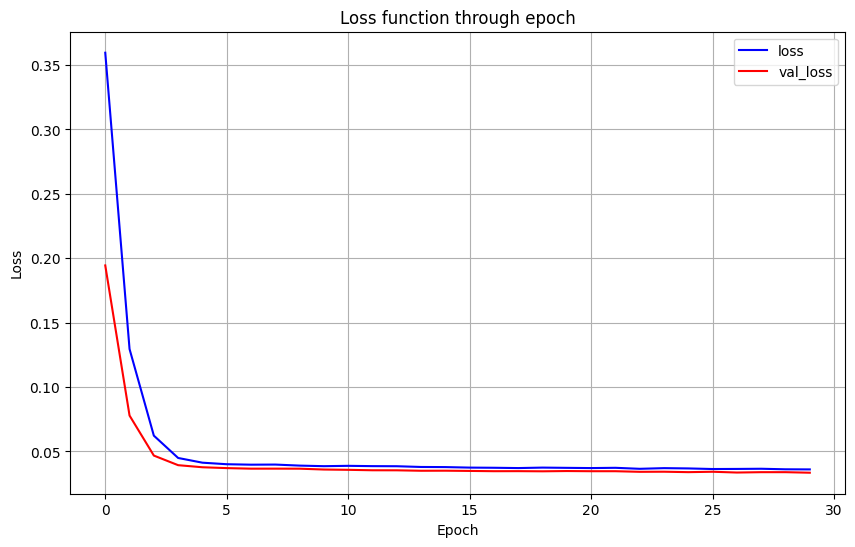

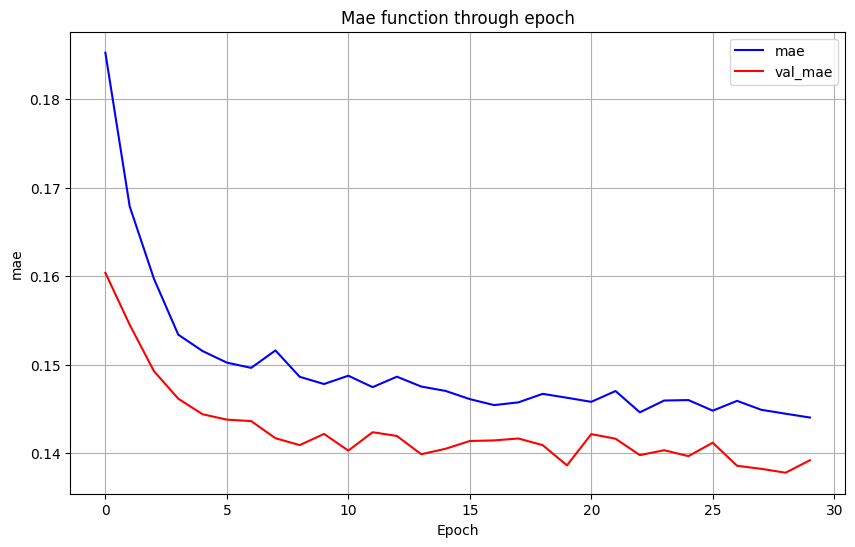

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0341 - mae: 0.1389
MSE:  0.03347592428326607
MAE: 0.13920274376869202


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
Nice 'N' NaastyThe Salsoul Orchestra,0.883,0.755138,True,True
ShiffteeOnyx,0.253,0.682028,False,False
Since I Made You CryThe Rivieras,0.569,0.576997,False,False
TonightNew Kids On The Block,0.383,0.415691,False,False
Never Comes The DayThe Moody Blues,0.180,0.374274,False,False
...,...,...,...,...
What Am I Living ForChuck Willis,0.682,0.629944,False,False
All Summer LongHit Masters,0.863,0.694220,True,False
Hey Daddy (Daddy's Home)Usher Featuring Plies,0.352,0.500388,False,False


array([[611,  79],
       [235, 213]], dtype=int64)

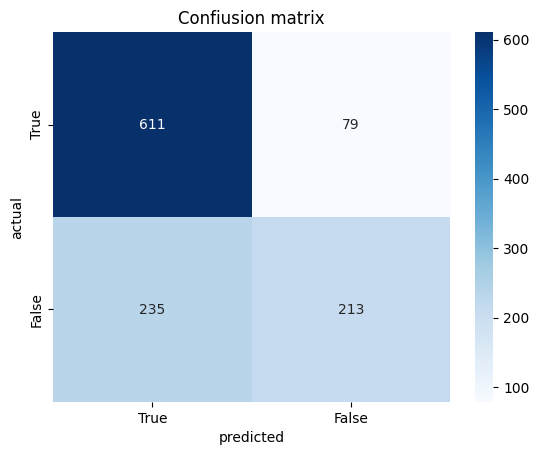

---------------------------------------------------------
USER 1


C:\Users\elped\AppData\Local\Temp\ipykernel_9032\2483456779.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = scaler.fit_transform(x[numerical_features])


,spotify_track_duration_minute,danceability,energy,loudness,mode,speechiness,acousticness,spotify_track_popularity,instrumentalness,liveness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
'65 Love AffairPaul Davis,0.014673,0.495306,0.241561,1.189029,-1.762504,-0.551610,0.580885,-0.102412,-0.230755,-0.399182,...,0,0,0,0,0,0,0,0,1,0
'til I Can Make It On My OwnTammy Wynette,-0.585593,-0.912422,-1.822560,-1.075449,0.567375,-0.495981,2.067133,-0.505205,-0.230545,-0.552870,...,0,0,0,0,0,0,0,0,0,0
'Til My Baby Comes HomeLuther Vandross,1.805941,1.617201,0.388998,0.470512,-1.762504,1.415631,-0.813588,-0.594714,-0.230755,-1.061269,...,0,0,0,0,0,0,0,0,0,1
'Tis The Damn SeasonTaylor Swift,0.176649,-0.019194,-1.085374,0.039752,0.567375,-0.503567,1.706718,1.240232,-0.230321,-0.571312,...,0,0,0,0,0,1,0,0,0,0
('til) I Kissed YouThe Everly Brothers,-1.157274,-0.426506,-1.095905,-0.978462,-1.762504,-0.317715,0.465700,0.479401,-0.230799,0.621306,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yummy Yummy YummyOhio Express,-1.243026,0.874035,0.410060,0.396826,0.567375,-0.523795,1.175384,-0.147166,-0.214866,-0.602665,...,0,0,0,0,0,1,0,0,0,0
YummyJustin Bieber,-0.128248,0.781139,-0.664125,0.500220,-1.762504,0.236045,0.335654,1.419251,-0.230799,-0.503690,...,0,0,0,0,0,1,0,0,0,0
Zack And CodeinePost Malone,-0.223528,1.174160,1.052465,0.912049,-1.762504,-0.302544,-0.492930,1.419251,-0.230799,-0.399182,...,0,0,0,0,0,0,0,1,0,0


,spotify_track_duration_minute,danceability,energy,loudness,mode,speechiness,acousticness,spotify_track_popularity,instrumentalness,liveness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
Takin' It To The StreetsTaylor Hicks,-0.023439,0.330952,1.010340,0.451290,0.567375,-0.174850,-0.492930,-1.534565,-0.230799,-0.725615,...,0,0,0,0,1,0,0,0,0,0
Take It AwayPaul McCartney,0.595882,0.030827,-0.042782,-0.181890,0.567375,-0.432766,-0.994019,-0.326186,-0.230429,-0.752664,...,0,0,0,0,0,0,0,0,1,0
Around The World (La La La La La)ATC,-0.385504,0.745410,1.668542,0.175475,-1.762504,-0.533910,-0.243983,-1.087017,-0.229640,4.451207,...,0,0,0,0,0,0,0,0,0,0
Prom QueenLil Wayne Featuring Shanell AKA SNL,-0.023439,-0.490818,1.184106,1.039035,0.567375,-0.029457,-1.024137,-0.012902,-0.230610,-0.067216,...,0,0,0,0,0,0,0,1,0,0
Ridin' The Storm OutREO Speedwagon,0.529186,-0.147819,0.831310,0.724192,-1.762504,-0.547817,-0.965557,0.300381,-0.230603,2.145889,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whiskey In My WaterTyler Farr,-0.480785,-0.369339,1.220965,0.946708,0.567375,-0.356909,-0.113937,0.613665,-0.230799,0.277045,...,0,0,0,0,0,0,0,0,0,0
BodyDreezy Featuring Jeremih,0.224289,1.124139,-0.385047,0.689533,0.567375,-0.095200,1.026759,0.882194,-0.230799,-0.811680,...,0,0,0,0,0,1,0,0,0,0
Read Your MindAvant,0.710218,1.231326,-1.311795,0.361876,-1.762504,0.152602,0.004963,0.703174,-0.230755,-0.750205,...,0,0,0,0,0,1,0,0,0,0


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4905 - mae: 0.2207 - val_loss: 0.2486 - val_mae: 0.1928
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2082 - mae: 0.1938 - val_loss: 0.1128 - val_mae: 0.1749
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0987 - mae: 0.1758 - val_loss: 0.0646 - val_mae: 0.1617
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0612 - mae: 0.1630 - val_loss: 0.0488 - val_mae: 0.1545
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0485 - mae: 0.1568 - val_loss: 0.0428 - val_mae: 0.1469
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0440 - mae: 0.1517 - val_loss: 0.0409 - val_mae: 0.1453
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0429 - mae: 0.1518 - val_loss: 0.0401 - val_mae: 0.1452
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0423 - mae: 0.1511 - val_loss: 0.0403 - val_mae: 0.1448
Epoch 9/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

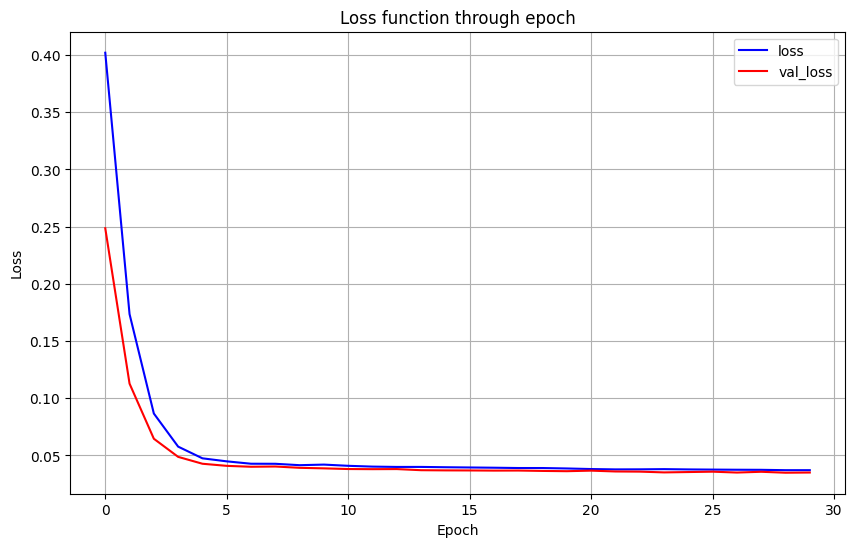

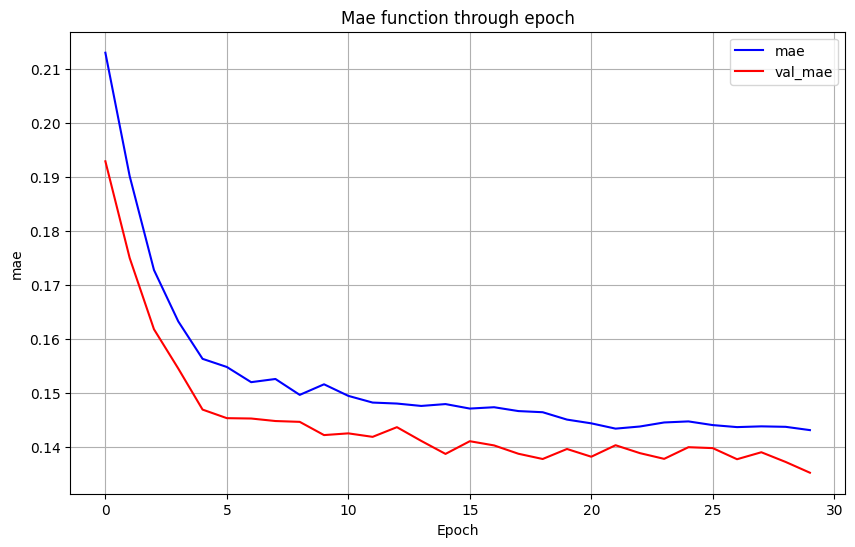

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0345 - mae: 0.1341 
MSE:  0.035089943557977676
MAE: 0.13518542051315308


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
One Night AffairThe O'Jays,0.876,0.774733,True,True
Young & Gettin' ItMeek Mill Featuring Kirko Bangz,0.858,0.504652,True,False
Everything Is Good About YouThe Lettermen,0.804,0.744413,True,True
Hot Fun In The SummertimeSly & The Family Stone,0.931,0.819297,True,True
Will The Wolf SurviveLos Lobos,0.844,0.785917,True,True
...,...,...,...,...
HeavenBryan Adams,0.335,0.338584,False,False
I Have NothingWhitney Houston,0.240,0.338419,False,False
Only You Can Love Me This WayKeith Urban,0.325,0.362402,False,False


array([[520,  62],
       [138, 214]], dtype=int64)

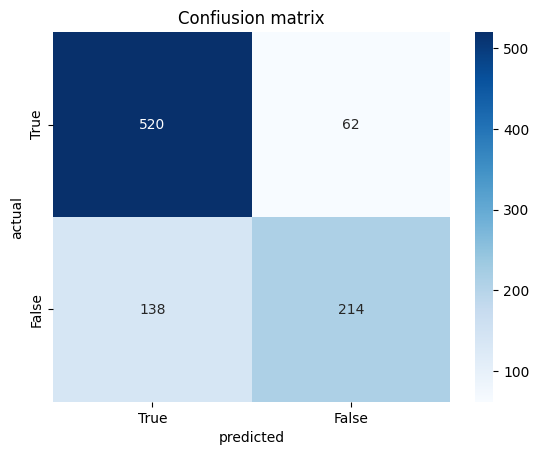

---------------------------------------------------------
USER 2


C:\Users\elped\AppData\Local\Temp\ipykernel_9032\2483456779.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = scaler.fit_transform(x[numerical_features])


,spotify_track_duration_minute,danceability,energy,loudness,mode,speechiness,acousticness,spotify_track_popularity,instrumentalness,liveness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,-0.283891,-0.368284,-0.377380,-0.374126,0.087600,0.131186,0.489938,-0.788464,0.330224,0.055330,...,0,0,0,0,1,0,0,0,0,0
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,-0.283891,-0.368284,-0.377380,-0.374126,0.087600,0.131186,0.489938,-0.788464,0.330224,0.055330,...,0,0,0,0,1,0,0,0,0,0
...And Then There Were DrumsSandy Nelson,-0.865735,-0.386107,0.264534,-2.882956,-1.929598,-0.514330,-1.253629,-1.366414,6.022889,-0.360866,...,0,0,0,0,0,0,0,0,1,0
'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,-0.283891,0.879340,0.126082,0.731297,-0.396528,2.797036,-0.606810,1.222968,-0.269004,0.055330,...,0,0,0,0,0,0,0,1,0,0
"'98 Thug ParadiseTragedy, Capone, Infinite",0.007031,-0.457400,0.189014,-0.020528,-0.046880,-0.249650,-0.299721,-0.002846,0.073412,-0.020342,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZeroChris Brown,-0.128040,0.888251,1.183351,1.481748,-1.929598,0.013127,-1.038052,1.067605,-0.354608,-0.895868,...,0,0,0,0,0,1,0,0,0,0
Zing Went The Strings Of My HeartThe Trammps,-0.335841,0.317909,1.391029,1.243842,0.759999,-0.004011,-1.116579,-0.278874,-0.354599,0.948261,...,0,0,0,0,0,0,0,0,0,0
Zing! Went The Strings Of My HeartThe Furys,-0.283891,-0.368284,-0.377380,-0.374126,0.087600,0.131186,0.489938,-0.788464,0.330224,0.055330,...,0,0,0,0,1,0,0,0,0,0


,spotify_track_duration_minute,danceability,energy,loudness,mode,speechiness,acousticness,spotify_track_popularity,instrumentalness,liveness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
Black Is BlackLos Bravos,-0.793004,-0.501958,1.340683,1.012458,0.759999,-0.089699,-0.216368,0.964029,-0.354565,-0.879977,...,0,0,0,0,0,1,0,0,0,0
When Love Takes OverDavid Guetta Featuring Kelly Rowland,-0.543643,0.380290,1.460255,1.464583,0.759999,-0.719982,-1.195984,0.756879,-0.350953,-0.179253,...,0,0,0,0,0,1,0,0,0,0
Lover Come Back To MeDead Or Alive,-0.522863,-0.163317,2.171394,1.305979,0.759999,1.806864,-0.418170,-0.175299,0.535673,0.615304,...,0,0,0,0,0,0,0,0,0,0
My LoveLionel Richie,0.391464,-2.266454,-2.926154,-1.479206,0.759999,-0.552414,1.893776,0.549728,-0.354608,-0.821709,...,0,0,0,0,0,0,0,0,0,0
Citizen/Soldier3 Doors Down,0.464194,-1.170328,1.195938,1.266843,-0.181360,-0.059232,-1.045510,1.159269,-0.269004,-0.096014,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LoveLana Del Rey,-0.065700,-0.885157,-1.119986,-0.608943,-1.929598,-0.382942,2.648339,2.051570,-0.344935,-0.497076,...,0,0,0,0,0,1,0,0,0,0
Le Bel Age (The Best Years)Pat Benatar,0.256393,-0.635632,0.126082,-0.164714,0.168288,-0.249650,-0.211981,0.280951,-0.012192,-0.020342,...,0,0,0,0,0,0,0,0,1,0
Little Bad GirlDavid Guetta Featuring Taio Cruz & Ludacris,-0.522863,0.389202,1.334389,2.122344,-1.929598,-0.560031,-1.234238,0.342578,-0.354608,1.182845,...,0,0,0,0,0,1,0,0,0,0


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4073 - mae: 0.2233 - val_loss: 0.0855 - val_mae: 0.1311
Epoch 2/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0665 - mae: 0.1330 - val_loss: 0.0361 - val_mae: 0.1215
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0355 - mae: 0.1231 - val_loss: 0.0301 - val_mae: 0.1118
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0311 - mae: 0.1180 - val_loss: 0.0289 - val_mae: 0.1092
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0312 - mae: 0.1188 - val_loss: 0.0280 - val_mae: 0.1069
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0302 - mae: 0.1167 - val_loss: 0.0276 - val_mae: 0.1077
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0297 - mae: 0.1161 - val_loss: 0.0271 - val_mae: 0.1060
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0305 - mae: 0.1169 - val_loss: 0.0269 - val_mae: 0.1049
Epoch 9/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

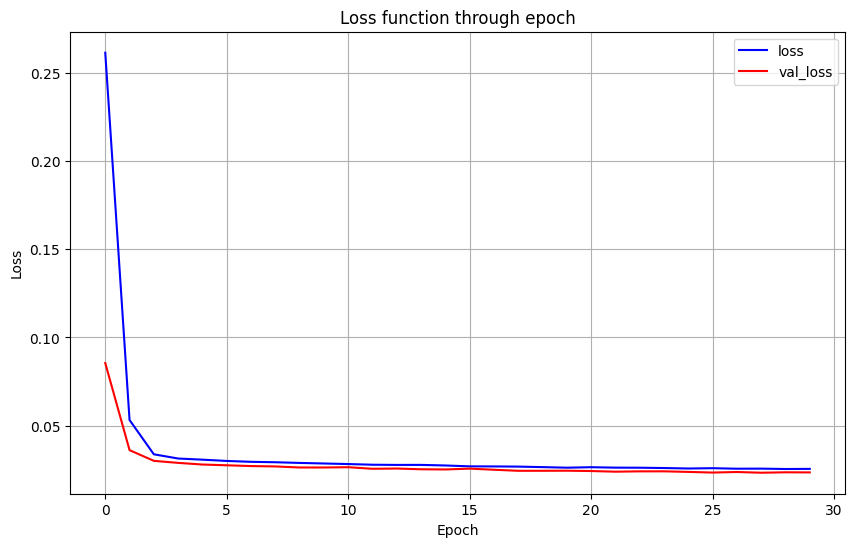

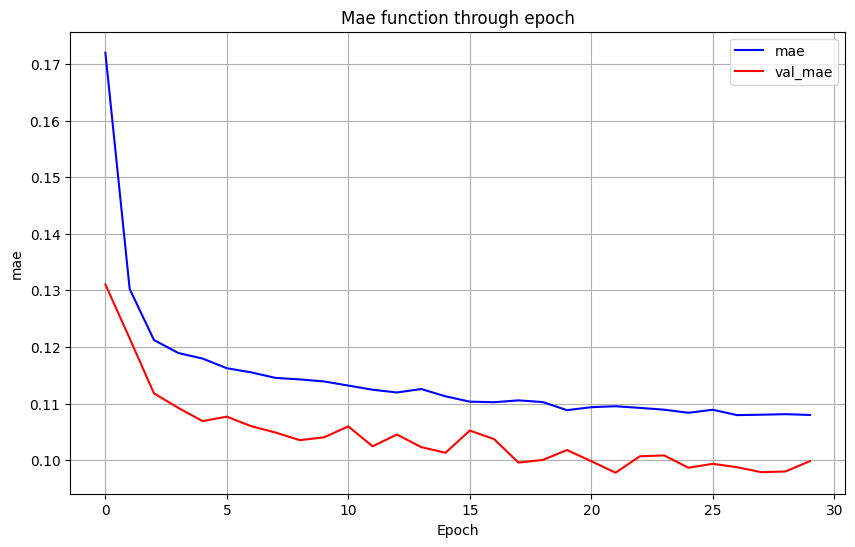

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0238 - mae: 0.1009
MSE:  0.0235248152166605
MAE: 0.09983482956886292


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
The Court RoomClarence Carter,0.690,0.672729,False,False
We Fell In Love While DancingBill Brandon,0.855,0.588134,True,False
Forever My LadyJodeci,0.771,0.632834,True,False
Isn't It Lonely TogetherRobert Knight,0.690,0.672729,False,False
Roll UpWiz Khalifa,0.602,0.482430,False,False
...,...,...,...,...
Shut UpAriana Grande,0.599,0.420045,False,False
Sugar Don't BiteSam Harris,0.975,0.801919,True,True
"Oh, How I Miss You TonightJeanne Black",0.110,0.408541,False,False


array([[1302,  156],
       [ 233,  463]], dtype=int64)

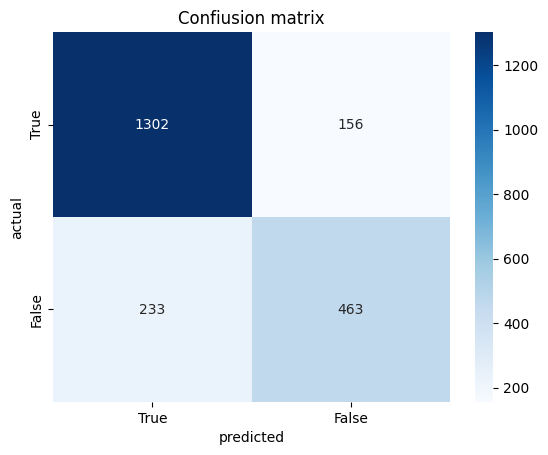

---------------------------------------------------------
USER 3


C:\Users\elped\AppData\Local\Temp\ipykernel_9032\2483456779.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = scaler.fit_transform(x[numerical_features])


,spotify_track_duration_minute,danceability,energy,loudness,mode,speechiness,acousticness,spotify_track_popularity,instrumentalness,liveness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
......And Roses And RosesAndy Williams,-0.816022,-2.497695,-1.684698,-1.248090,0.575195,-0.499497,1.666673,-0.137479,-0.202307,-0.507249,...,0,0,0,0,0,1,0,0,0,0
'Til You Do Me RightAfter 7,1.271318,0.454788,0.089483,0.450780,0.575195,-0.553224,-1.055670,0.039868,-0.204563,-0.735449,...,0,0,0,0,0,0,0,0,0,0
(Forever) Live And DieOrchestral Manoeuvres In The Dark,0.028623,0.409663,0.104393,-1.127863,0.575195,-0.518459,-1.016121,0.305889,1.857653,-0.270738,...,0,0,0,0,0,0,0,0,1,0
(He's My) DreamboatConnie Francis,-0.883982,-1.085918,-0.795122,0.712145,0.575195,-0.510032,1.238498,-0.580846,-0.204546,0.962950,...,0,0,0,0,0,1,0,0,0,0
(I Can Feel Your Love) Slipping AwayBarbara Mason,-0.272342,-0.654004,-0.482032,1.001737,0.575195,-0.563759,0.529231,-1.112887,-0.204563,0.662518,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Your Smiling FaceJames Taylor,-0.825730,0.912488,-0.044698,-0.429757,0.575195,-0.207684,-0.863155,0.882266,-0.204504,-0.701570,...,0,0,0,0,0,0,0,0,1,0
Your Used To BeBrenda Lee,-1.379118,0.429002,-0.760335,-0.938373,0.575195,-0.555331,0.878962,-1.290234,-0.204563,-0.398582,...,0,0,0,0,0,1,0,0,0,0
Yours LoveJoe Simon,-0.553891,-0.853845,-0.531729,-1.045271,0.575195,-0.476320,0.692656,-1.378907,-0.204326,0.061654,...,0,0,0,0,0,0,0,0,0,1


,spotify_track_duration_minute,danceability,energy,loudness,mode,speechiness,acousticness,spotify_track_popularity,instrumentalness,liveness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
GoldPrince,3.659623,-0.067376,1.649968,1.580399,0.575195,-0.527941,-1.298880,0.261552,-0.203405,-0.392190,...,0,0,1,0,0,0,0,0,0,0
All Eyes On YouMeek Mill Featuring Chris Brown & Nicki Minaj,0.116000,0.306520,0.665968,1.045385,-1.738540,1.307213,-1.231843,1.325634,-0.204563,-0.468896,...,0,0,0,0,0,0,0,1,0,0
Lonesome Number OneDon Gibson,-1.204364,-0.125394,0.104393,-0.345337,0.575195,-0.522673,0.620749,-0.935540,-0.127822,0.828714,...,0,0,0,0,0,0,0,0,1,0
DigIncubus,0.659679,-0.589540,1.843786,1.188875,0.575195,-0.424700,-1.215174,0.970940,-0.204563,-0.481680,...,0,0,0,0,0,0,0,0,1,0
Homegrown HoneyDarius Rucker,-0.194674,0.751326,1.933241,1.113079,0.575195,-0.293016,-0.918720,0.571909,-0.204563,-0.899728,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Have A HeartBonnie Raitt,1.183941,1.131668,-1.267244,-1.586296,0.575195,-0.433128,0.274287,0.039868,-0.204073,-0.925296,...,0,0,0,0,0,0,0,0,1,0
"Hush, Hush, Sweet CharlottePatti Page",-1.039318,-1.330884,-1.794031,-2.082105,0.575195,-0.504764,1.245035,-0.492173,-0.204563,0.796754,...,0,0,0,0,0,1,0,0,0,0
Feelin' On Yo BootyR. Kelly,0.475216,1.260597,-1.321910,0.393019,0.575195,-0.275107,-0.464397,0.128542,-0.204538,-0.577562,...,0,0,0,0,1,0,0,0,0,0


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4554 - mae: 0.1865 - val_loss: 0.2647 - val_mae: 0.1771
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2250 - mae: 0.1714 - val_loss: 0.1367 - val_mae: 0.1697
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1204 - mae: 0.1693 - val_loss: 0.0784 - val_mae: 0.1605
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0709 - mae: 0.1577 - val_loss: 0.0541 - val_mae: 0.1537
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0532 - mae: 0.1569 - val_loss: 0.0442 - val_mae: 0.1496
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0439 - mae: 0.1497 - val_loss: 0.0404 - val_mae: 0.1480
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0410 - mae: 0.1472 - val_loss: 0.0384 - val_mae: 0.1448
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0390 - mae: 0.1444 - val_loss: 0.0375 - val_mae: 0.1435
Epoch 9/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0383 - mae: 

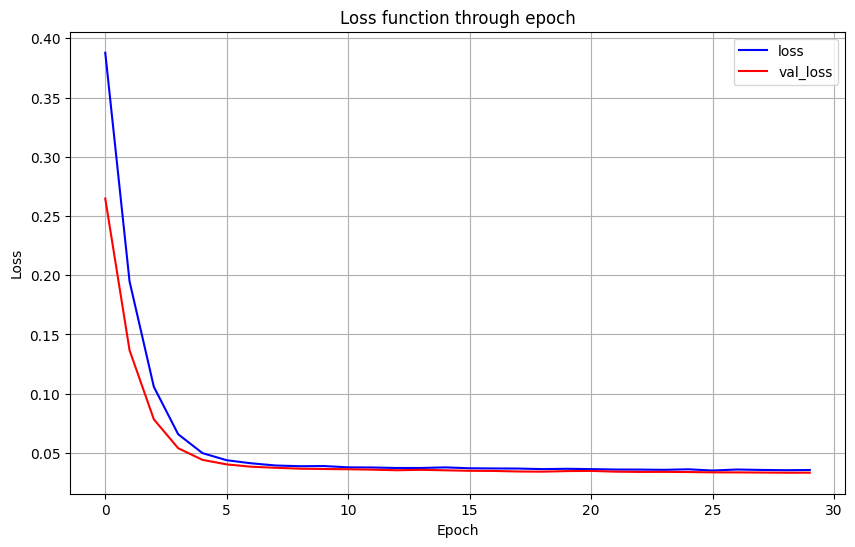

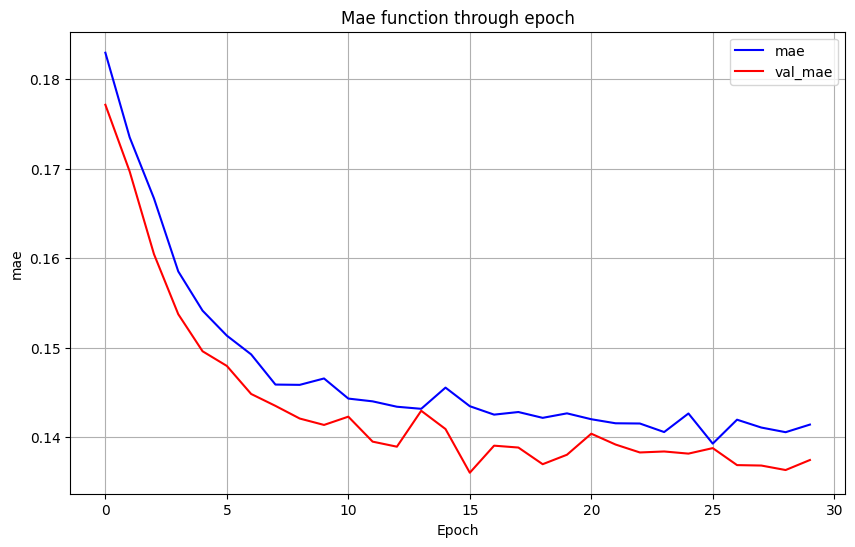

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0349 - mae: 0.1425 
MSE:  0.033374540507793427
MAE: 0.1374594122171402


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
Can't Let You Out Of My SightChuck Jackson & Maxine Brown,0.4530,0.743947,False,True
It's All Coming Back To Me NowCeline Dion,0.2860,0.256485,False,False
Birthday CakeRihanna Featuring Chris Brown,0.3290,0.747185,False,True
Jack The RipperLink Wray And The Wraymen,0.2920,0.515680,False,False
Little StarThe Elegants,0.6970,0.444059,False,False
...,...,...,...,...
Who Needs PicturesBrad Paisley,0.1520,0.409206,False,False
TwoLil Uzi Vert,0.0371,0.307075,False,False
Hands OnKanye West Featuring Fred Hammond,0.5980,0.414382,False,False


array([[525,   9],
       [127,  54]], dtype=int64)

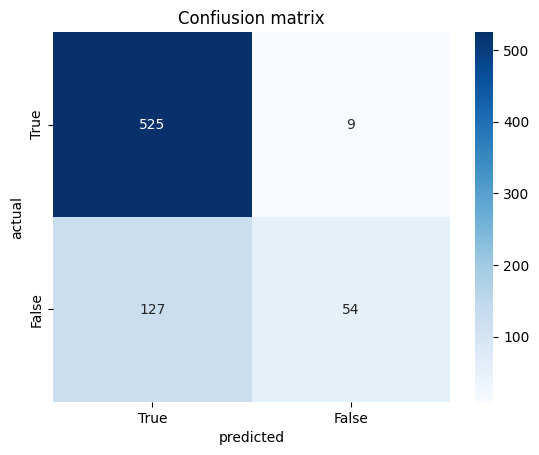

---------------------------------------------------------
USER 4


C:\Users\elped\AppData\Local\Temp\ipykernel_9032\2483456779.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = scaler.fit_transform(x[numerical_features])


,spotify_track_duration_minute,danceability,energy,loudness,mode,speechiness,acousticness,spotify_track_popularity,instrumentalness,liveness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
...Ready For It?Taylor Swift,-0.126755,0.861989,0.611995,0.442281,0.564626,0.295476,-0.840222,1.322069,-0.208535,-0.010544,...,0,0,0,0,0,1,0,0,0,0
'TilThe Angels,-1.131688,-1.571547,-2.066447,-1.283196,0.564626,-0.658321,1.871296,-1.447627,-0.207059,-0.655080,...,0,0,0,0,0,0,0,0,0,0
"""B"" GirlsYoung And Restless",0.446057,0.875509,-0.732261,-1.065071,0.564626,3.068994,-0.972500,-1.007992,-0.208535,0.708386,...,0,0,0,0,1,0,0,0,0,0
"""Cherry Cherry"" from Hot August NightNeil Diamond",3.812583,-0.983443,1.538374,0.846176,0.564626,0.304630,-0.691004,-1.183846,-0.201097,4.178004,...,0,0,0,0,0,0,0,0,1,0
"(Girls, Girls, Girls) Made To LoveEddie Hodges",-1.091491,0.841710,-1.336421,-0.477081,0.564626,-0.093549,0.462013,-1.183846,-0.208535,-0.783237,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young TurksRod Stewart,1.450990,1.051264,0.898971,-0.192012,-1.771084,-0.652829,-0.042589,0.530727,3.703170,-0.379386,...,0,0,0,0,0,0,0,0,1,0
Your Body's Callin'R. Kelly,1.028918,1.166181,-0.465423,0.387610,0.564626,-0.672967,0.616998,0.266947,-0.202565,-0.529424,...,0,0,0,0,1,0,0,0,0,0
Your LoveNicki Minaj,0.496303,-0.415617,-0.616463,-0.595906,0.564626,2.190256,-1.022816,0.618654,-0.174666,1.327291,...,0,0,0,0,0,1,0,0,0,0


,spotify_track_duration_minute,danceability,energy,loudness,mode,speechiness,acousticness,spotify_track_popularity,instrumentalness,liveness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
Burn The House DownAJR,-0.056410,-0.212823,0.088390,1.042544,0.564626,0.588389,-0.898972,1.322069,-0.208535,-0.110569,...,0,0,0,0,0,0,0,0,1,0
SanctuaryJoji,-0.599074,0.449640,0.038043,0.249818,0.564626,0.222248,0.490847,1.673776,-0.206280,1.083480,...,0,0,0,0,0,1,0,0,0,0
Mind ReaderDustin Lynch,-0.508630,-0.618412,0.793243,1.094705,-1.771084,-0.571363,-0.934294,0.750544,-0.208535,-0.091814,...,0,0,0,0,0,0,0,0,0,0
Any Way That You Want MeEvie Sands,0.034034,-1.084840,-0.405008,0.556644,0.564626,-0.501796,-0.193970,-1.139883,-0.207198,-0.379386,...,0,0,0,0,1,0,0,0,0,0
Give Ireland Back To The IrishWings,0.144577,-0.665731,-0.405008,-0.829094,-1.771084,-0.588754,-0.129093,-0.612322,-0.207879,-0.516921,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rain In My HeartFrank Sinatra,-0.237298,-2.004176,-2.096655,-2.065045,-1.771084,-0.655575,2.282186,-0.656285,-0.208527,-0.216846,...,0,0,0,0,1,0,0,0,0,0
It's Your LifeFrancesca Battistelli,-0.729715,-0.861766,1.029872,1.281590,0.564626,-0.466097,-1.019356,-0.084761,-0.208535,-0.410644,...,0,0,0,0,0,0,0,0,1,0
Keep Holding OnAvril Lavigne,0.395810,-1.429591,0.722758,1.601247,0.564626,-0.644591,-0.895368,0.970361,-0.208535,-0.348128,...,0,0,0,0,0,1,0,0,0,0


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.5061 - mae: 0.1983 - val_loss: 0.3473 - val_mae: 0.1861
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3095 - mae: 0.1772 - val_loss: 0.2156 - val_mae: 0.1791
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1939 - mae: 0.1744 - val_loss: 0.1379 - val_mae: 0.1753
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1262 - mae: 0.1736 - val_loss: 0.0928 - val_mae: 0.1688
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0861 - mae: 0.1646 - val_loss: 0.0677 - val_mae: 0.1641
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0625 - mae: 0.1558 - val_loss: 0.0538 - val_mae: 0.1590
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0510 - mae: 0.1531 - val_loss: 0.0464 - val_mae: 0.1551
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0473 - mae: 0.1557 - val_loss: 0.0429 - val_mae: 0.1537
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0428 - mae: 

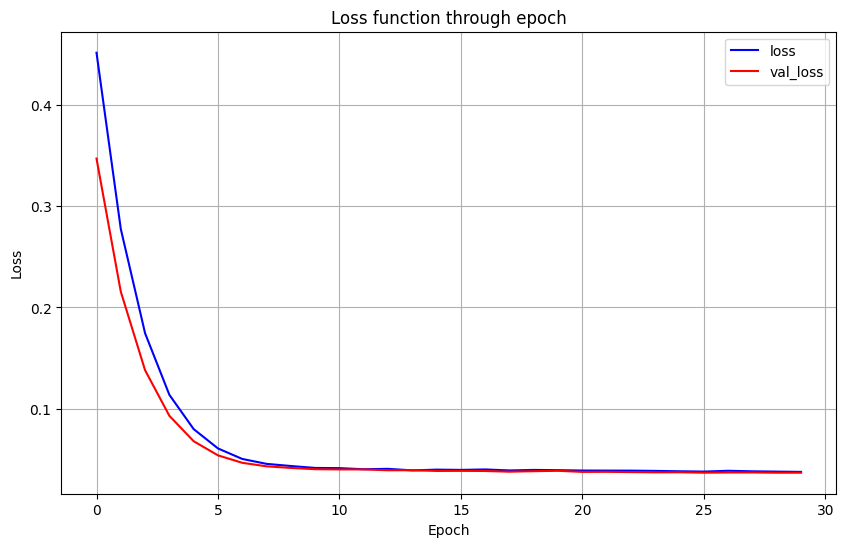

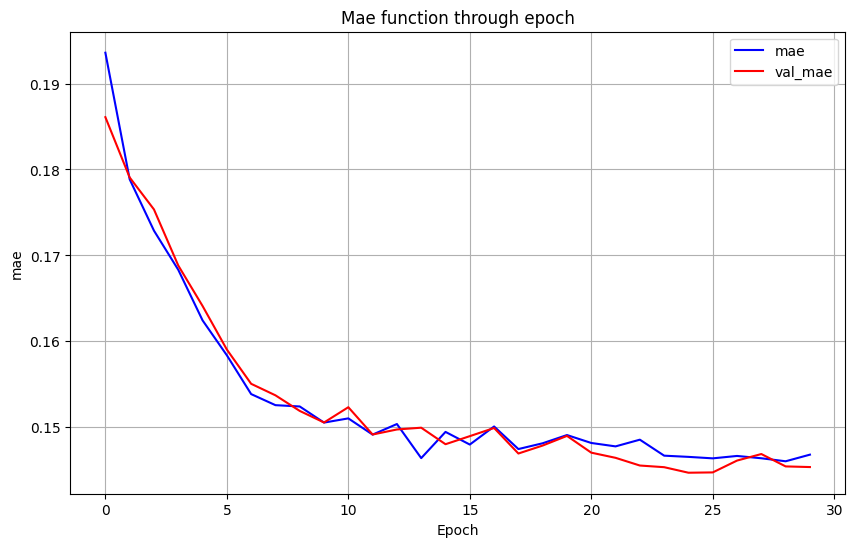

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0374 - mae: 0.1480 
MSE:  0.036589112132787704
MAE: 0.1453668177127838


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,0.816,0.643983,True,False
Wish You Were HereAvril Lavigne,0.340,0.579733,False,False
Wichita LinemanGlen Campbell,0.391,0.372462,False,False
PinkAerosmith,0.777,0.531586,True,False
Go Hard Or Go HomeWiz Khalifa & Iggy Azalea,0.386,0.578747,False,False
...,...,...,...,...
Pull Up N WreckBig Sean & Metro Boomin Featuring 21 Savage,0.091,0.377281,False,False
Empire State Of MindGlee Cast,0.719,0.570496,True,False
Impossible Mission (Mission Impossible)Soul Survivors,0.786,0.700942,True,True


array([[283,  22],
       [104,  94]], dtype=int64)

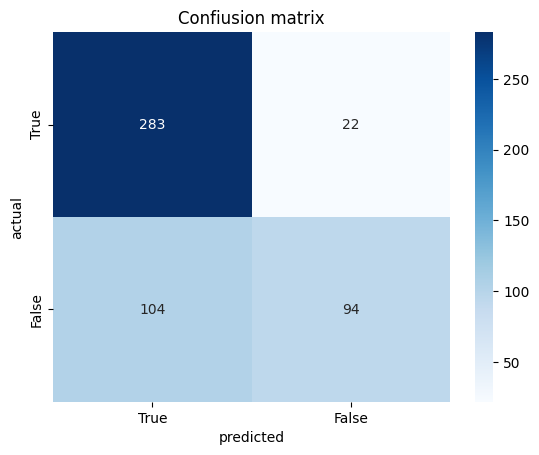

In [87]:
dizio_model_user = {} #in this dizio we store the model for each user
dizio_accuracy = {} #accuracy of the model

# DICTIONARY TO STORE SONG RECOMMENDATION PER USER
reccomandations_songs_per_user={}

#threshold
threshold = 0.7

#loop creation user and model
for i in range(0, len(df_one_hot['User'].unique())): #i indica lo user   
#for i in range (0,1):
    print('---------------------------------------------------------')
    print(f'USER {i}')

    #select user
    mask_user = df_one_hot['User'] == i
    #display(mask_user)
    user_i_df = df_one_hot[mask_user]
    #display(user_i_df) 

    #return train and test
    x_train,x_test,y_train,y_test = return_train_test(user_i_df)

    #creation model for the specific user
    model_user_i = create_model_user(x_train.shape[1])
    
    #fit the model with the different x, y train (for different user)
    history_model_user_i = fit_model(model_user_i, x_train, y_train, x_test, y_test)

    #test no function
    '''history_model_user_i = model_user_i.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=30,
        batch_size=32,
        #verbose=1
    )'''

    #prediction
    y_hat = model_user_i.predict(x_test)

    #plot the metrics of the model
    plot_for_model(history_model_user_i, y_hat, x_test)

    #accuracy
    test_loss, test_mae = model_user_i.evaluate(x_test,y_test,verbose=1)
    print('MSE: ', test_loss)
    print('MAE:', test_mae)

    #reccomandation
    reccomandation_df = reco_function_conf_matrix(y_test, y_hat, threshold)

    #save the model in the dictionary
    #add also the raccomandations
    dizio_model_user[f"User{i}"] = {'model_user_i' : model_user_i,
                                    'history_model_user_i': history_model_user_i,
                                    'x_train': x_train,
                                    'x_test': x_test,
                                    'y_train': y_train,
                                    'y_test': y_test,
                                    'y_hat': y_hat,
                                    'recommendations:': reccomandation_df} 
    #save accuracy 
    dizio_accuracy[f'User{i}'] = {
        'MAE' : mean_absolute_error(y_test, y_hat),
        'MSE' : mean_squared_error(y_test, y_hat)
    }

# DISPLAY DICTIONARY ACCURACY

In [88]:
display(dizio_accuracy)

{'User0': {'MAE': 0.13920275629983006, 'MSE': 0.02916087327866868},
 'User1': {'MAE': 0.1351854063353651, 'MSE': 0.028289331165672265},
 'User2': {'MAE': 0.09983484118938889, 'MSE': 0.02021968937223677},
 'User3': {'MAE': 0.13745940776944995, 'MSE': 0.0281158052293299},
 'User4': {'MAE': 0.1453668118682581, 'MSE': 0.030828307987958596}}

# DISPLAY DICTIONARY MODEL

In [78]:
#display(dizio_model_user)

# CONCLUSION 

Creare una tabella dove compariamo ONE HOT e NN normale

Ho fatto un file con tutti i risultati a confronto 

# SAVE

#DA COMPLETARE